##  Lecturas previas
- https://youtu.be/8TuRJg76sW8
- https://youtu.be/_s3z8dQX3pM
- https://youtu.be/Kdsp6soqA7o

Este es nuestro perceptro del notebook anterior.

In [4]:
import numpy as np

# Algoritmo supervisado
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):        
        self.eta = eta
        self.n_iter = n_iter
        self.random_state =random_state
        
    def fit(self, X, y):
        """Cuando en realidad el perceptron aprende."""
        rgen = np.random.RandomState(self.random_state)        
        if self.random_state is None:            
            self.w_ = np.zeros(1 + len(X[0])) 
        else:
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        
        # Lista de errores 
        self.errors_ = []
        # Esta parte de iterar y ver actualizar nuevo pesos se llama 'Epoca'
        for _ in range(self.n_iter):
            errors = 0                        
            for xi, yi in zip(X, y):                                
                update = self.eta * (yi - self.predict(xi))                
                self.w_[1:] += update * xi 
                # x_0 = 1
                self.w_[0] += update * 1                                               
                errors += int(update != 0.0)
            self.errors_.append(errors)
            # Testear
            # print("---Iteración: {} - Lista de errores by iter: {}--".format(_ + 1, self.errors_))            
            #print("pesos: ", self.w_)
        return self 
    
    def net_input(self, X):
        """Calcular el producto punto"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """ Predice el perceptrón en el paso actual (funcion activacion, en esta caso funcion escalon 1 a -1)"""                
        return np.where(self.net_input(X) >= 0.0, 1, -1)        

Probaremos nuestro perceptron para conjunto llamdo **iris**.
Por el momento se utilizaran dos clases: *Setosa y Versicolor*. La regla del perceptron no se restringe a **dos dimensiones**, pero para simplificar la visualizacion sólo se usarán las caracteristicas *sepal length y petal length*. De igual forma, sólo se condiseran dos topos de flor.

Sin embargo, la relga del perceptron puede extenderse para ser usada en problemas **multi-clase** con la tecnica **One-versus-All (OvA)**, tambien conocidad como **One-versus-Rest (OvR)**: se toma cada clase para entrenar el perceptron, considerando dicha clase como positiva y el resto como negativas; de esta forma se obtiene $n$ clasificadores binarios y para clasificar una muestra nueva, se utilizan los $n$ clasificadores para asignar la etiqueta de clase con mayor confienza para dicha clase. (https://youtu.be/_s3z8dQX3pM)

*Lectura:*\
https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

Dataset: Iris 

|sepal length|sepal width|petal length|petal width| clase|
|-----------------|--------|-----------|-----------|------|
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|...|...|...|...|...|



    Number of Instances: 150 (50 in each of three classes).
    Class Distribution: 33.3% for each of 3 classes.



In [5]:
import pandas as pd
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df = pd.read_csv('https://bit.ly/38XWXS4',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Posteriormente extraemos las $100$ primeras muestras correspondientes a $50$ de *Iris-setosa* y $50$ de *Iris-versicolor*, además de convertir las etiquetas de clase en dos nuermos enteros:

\begin{align*}
1 & \rightarrow \text{versicolor} \\
-1 & \rightarrow \text{setosa} 
\end{align*}

Asignandolas al vector y:


In [6]:
import numpy as np

# Las caracteristicas tomaremos seran: sepal length y petal length
X = df.iloc[0:100, [0, 2]].values  # array de numpy con los values
y = df.iloc[0:100, 4].values  # Los nombres de las flores
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

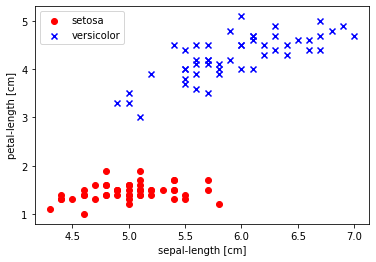

In [7]:
# Graficando las muestras
import matplotlib.pyplot as plt
# Usaremos una gráfica de disperción
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# Agrega etiquetas a los ejes
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
# Una legenda para cada uan de las clase
plt.legend(loc='upper left')
plt.show()


Ahora entrenamos al perceptrón con este subconjunto de datos de Iris; ademas graficaremos las clasificaciones erroneas en cada **época (epoch)** para verificar si el algoritmo encuentra una frontera de decisión que separe las dos clases:

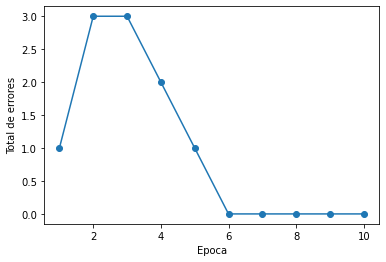

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoca')
plt.ylabel('Total de errores')
plt.show()

Se observa que después de 6 épocas ha convergido y puede separar ambas clases. Podemos revisar los pesos calculados para este ejemplo:

In [9]:
print('Pesos: ', ppn.w_)

Pesos:  [-0.38375655 -0.70611756  1.83471828]


Para dibujar una línea que marque el límite de las clases, recordamos que le perceptrón realiza la operación:

$$w_0x_0 + w_1x_1 + w_2x_2$$

Como la caracteristica de sesgo (bias) esta definida como $x_0 = 1$, podemos despejar a $x_2$ obteniendo:

$$x_2 = - \frac{w_0 + w_1x_1}{w_2}$$

Con este resultado, podemos mostrar los resultados en una gráfica:

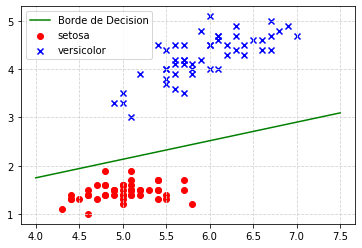

In [10]:
# Borde de decisión
x1 = np.linspace(4, 7.5, 2) # Hasta donde va ir la linea recta
x2 = - (ppn.w_[0] + ppn.w_[1] * x1) / ppn.w_[2]
plt.plot(x1, x2, 'g', label = 'Borde de Decision')

# Clase -1: setosa
registros = y == -1
x1 = X[registros][:, 0] # sepal length 
x2 = X[registros][:, 1] # petal length
plt.scatter(x1, x2, c='r', marker='o', label='setosa')

#clase 1; versicolor
registros = y == 1
c1 = X[registros][:, 0] # sepal length 
c2 = X[registros][:, 1] # petal length
plt.scatter(c1, c2, c='b', marker='x', label='versicolor')
plt.legend()
plt.grid(color='lightgray', linestyle='--')
plt.show()

Por último, una función que ayude a graficar los resultados que, además, pone cada zona en un color diferente:

In [11]:
# Función para graficar
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Necesitar un clasificador ya entrenado (Fit es entrenar)
    Arguments:
    X -- conjunto de caractaristicas (vector de caracteristicas)
    y -- salidas (clases que pertenece cada uno de los puntos)
    clasificador -- Es un clasificador ya entrenado (como el perceptro)
    resolucion --  Que tanto va ir aumentando en cada una de las dos dimensiones
    """
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Superficies de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Conjuntos de clase    
    plt.scatter(X[:, 0],
                X[:, 1],
                alpha=0.9,
                c=colors[y.astype(int)],
                edgecolor='black',)

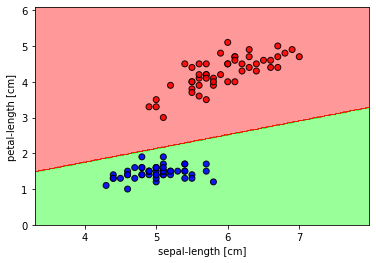

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.show()

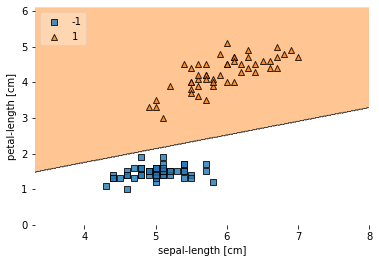

In [13]:
# plot_decision_regions predefinido 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X, y, clf=ppn, legend=2)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.show()